<a href="https://colab.research.google.com/github/bounty-coder/Deep_Learning/blob/main/02%20CNN%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#Load Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalise pixel value
train_images, test_images = train_images/255.0, test_images/255.0
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

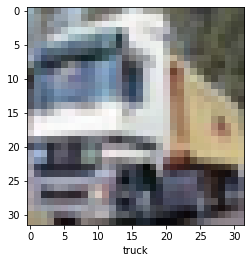

In [4]:
#Let's look at dataset
Img_index = 1

plt.imshow(train_images[Img_index], cmap=plt.cm.binary)
plt.xlabel(class_name[train_labels[Img_index][0]])
plt.show()

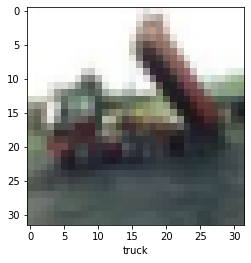

In [5]:
Img_index = 2

plt.imshow(train_images[Img_index], cmap=plt.cm.binary)
plt.xlabel(class_name[train_labels[Img_index][0]])
plt.show()

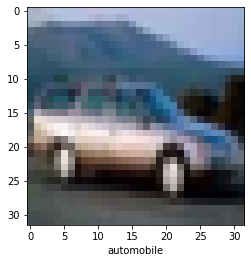

In [6]:
Img_index = 4

plt.imshow(train_images[Img_index], cmap=plt.cm.binary)
plt.xlabel(class_name[train_labels[Img_index][0]])
plt.show()

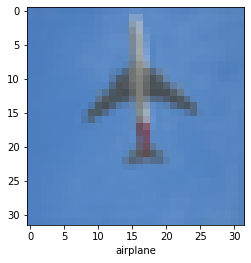

In [7]:
Img_index = 1243

plt.imshow(train_images[Img_index], cmap=plt.cm.binary)
plt.xlabel(class_name[train_labels[Img_index][0]])
plt.show()

**CNN Architecture**

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

*Layer 1*: The input shape of our data will be 32,32,3 and will process 32 filters of size 3x3 over our input data. We will apply the activation function relu to the output of each convolution operation.<br><br>
*Layer 2*: The layer will perform the MaxPooling operation using 2x2 samples and a stride of 2.<br><br>
*Other Layer*:
The next set of layer do very similar things but take as input the feature map from previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spatial dimensions as it passed through the layers, meaning we can afford to add more depth.

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**ADDING DENSE LAYER**<br><br>
So far we have just completed the convolutional base. Now we need to take these extracted features and add a way to classify them. So add following layers to the model.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64 node dense layer, followed by final output of 10 layers.

**Training**

Now we will train and compile the model using the recommended hyper parameters from tensorflow.

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5327 - accuracy: 0.4405 - val_loss: 1.2715 - val_accuracy: 0.5479
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1836 - accuracy: 0.5796 - val_loss: 1.1639 - val_accuracy: 0.5830
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0273 - accuracy: 0.6392 - val_loss: 1.0577 - val_accuracy: 0.6251
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9229 - accuracy: 0.6775 - val_loss: 0.9210 - val_accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8401 - accuracy: 0.7054 - val_loss: 0.9029 - val_accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7795 - accuracy: 0.7254 - val_loss: 0.8923 - val_accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7334 - accuracy: 0.7433 - val_loss: 0.8734 -

**Evaluating Model**

In [16]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8979 - accuracy: 0.7061
0.7060999870300293


**Data Augmentation**<br>
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalise better. These trasformations can be things like compressions, rotations, stretches, and even color changes.

In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

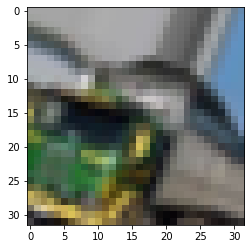

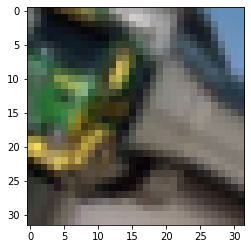

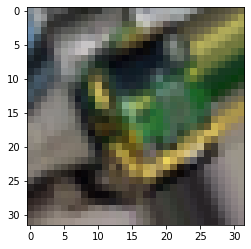

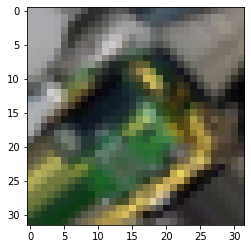

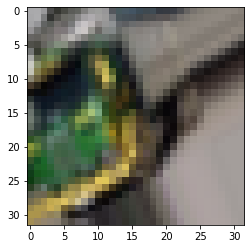

In [18]:
#creates a data generator object that transforms images
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,fill_mode='nearest')

#pick an image to tranform
test_img = train_images[14]
img = image.img_to_array(test_img)   #convert image to numpy array
img = img.reshape((1,) + img.shape)  #reshape image

i=0

for batch in datagen.flow(img,save_prefix='test', save_format='jpeg'):   #this loops runsforever until we break, saving images to current directory
  plt.figure(i)
  plot=plt.imshow(image.img_to_array(batch[0]))
  i+=1
  if i>4:
    break

plt.show()